### Importing required modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from feature_engine.encoding import CountFrequencyEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
import pickle

### Importing dataset

In [3]:
data = pd.read_csv("Bengaluru_House_Data.csv")

### Analysing dataset 

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [85]:
data.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
bhk/bedroom       16
sqft               0
dtype: int64

We need to convert few of the columns from object Dtype to numeric Dtype and there are null values as well.

#### Let's deal with data type issue

In [8]:
data['bhk/bedroom'] = data['size'].str.split(' ').str[1]
data['size'] = data['size'].str.split(' ').str[0]

In [104]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
0,Super built-up Area,to be vacated,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07,BHK,1056.0
1,Plot Area,Immediate Possession,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00,Bedroom,2600.0
2,Built-up Area,Immediate Possession,Uttarahalli,3,NaN,1440,2.0,3.0,62.00,BHK,1440.0
3,Super built-up Area,Immediate Possession,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00,BHK,1521.0
4,Super built-up Area,Immediate Possession,Kothanur,2,NaN,1200,2.0,1.0,51.00,BHK,1200.0


In [9]:
data['bhk/bedroom'].unique()

array(['BHK', 'Bedroom', 'RK', nan], dtype=object)

In [10]:
data['size'] = pd.to_numeric(data['size'], errors='coerce').astype('Int64')

In [11]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

data[~data["total_sqft"].apply(fcnIsFloat)]['total_sqft'].unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405', '1

In [13]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [14]:
data["sqft"] = data["total_sqft"].apply(fcnExtractTotalSqft)

Problem solved for data type of total_sqft and size of the houses 

Changing date values in availability to "to be vacated" and "ready to move" to "Immediate Possession"

In [15]:
data.loc[data['availability'].str.contains('-'), 'availability'] = 'to be vacated'

In [16]:
data['availability'] = data['availability'].replace({'Ready To Move' : 'Immediate Possession'})

#### Dealing with Null Values one by one in each column. 

In [17]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
bhk/bedroom       16
sqft               0
dtype: int64

In [18]:
data[data['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
568,Super built-up Area,Immediate Possession,NaN,3,Grare S,1600,3.0,2.0,86.0,BHK,1600.0


In [19]:
data[data['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
568,Super built-up Area,Immediate Possession,NaN,3,Grare S,1600,3.0,2.0,86.0,BHK,1600.0
12238,Carpet Area,Immediate Possession,Anantapura,3,Grare S,1600,3.0,2.0,77.0,BHK,1600.0


In [20]:
# So the location for Grare S is Anantapura we can fill it.
data["location"] =  data["location"].replace(to_replace = np.nan, value = "Anantapura")

We have successfully removed null value from Location column now moving on to Society column

In [21]:
data[data['society'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
2,Built-up Area,Immediate Possession,Uttarahalli,3,NaN,1440,2.0,3.0,62.00,BHK,1440.0
4,Super built-up Area,Immediate Possession,Kothanur,2,NaN,1200,2.0,1.0,51.00,BHK,1200.0
8,Super built-up Area,Immediate Possession,Marathahalli,3,NaN,1310,3.0,1.0,63.25,BHK,1310.0
9,Plot Area,Immediate Possession,Gandhi Bazar,6,NaN,1020,6.0,NaN,370.00,Bedroom,1020.0
10,Super built-up Area,to be vacated,Whitefield,3,NaN,1800,2.0,2.0,70.00,BHK,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Immediate Possession,Rachenahalli,2,NaN,1050,2.0,2.0,52.71,BHK,1050.0
13311,Plot Area,Immediate Possession,Ramamurthy Nagar,7,NaN,1500,9.0,2.0,250.00,Bedroom,1500.0
13312,Super built-up Area,Immediate Possession,Bellandur,2,NaN,1262,2.0,2.0,47.00,BHK,1262.0
13316,Super built-up Area,Immediate Possession,Richards Town,4,NaN,3600,5.0,NaN,400.00,BHK,3600.0


In [22]:
data['society'].nunique()

2688

There are two choices now with society since these column have a lot of null and unique values in Society column :
1. Either we drop this column since it will make high dimensional data and also there are alot of null values
2. We fill the null values in this column using probablistic frequency imputer. 

1. Trying to impute :

Approach: Will group the data based on "Location" column and fill the Society column based on the probability of occurence of each society in that location.

In [23]:
def probabilistic_imputer(series):
    # Calculate frequencies of non-missing values
    frequencies = series.dropna().value_counts(normalize=True)
    categories = frequencies.index
    probs = frequencies.values
    
    # Check if there are categories available "because some of the categories only have null values in Society column"
    if len(categories) == 0:
        return series
    
    def impute_value(value):
        if pd.isnull(value):
            return np.random.choice(categories, p=probs)
        else:
            return value

    return series.apply(impute_value)

In [24]:
# Group the data by 'location'
grouped_location = data.groupby('location')


housing_list = []

# Iterate through each group in the grouped DataFrame
for location, group in grouped_location:
    group['society'] = probabilistic_imputer(group['society'])
    housing_list.append(group)

# Concatenate all DataFrames in the list
housing = pd.concat(housing_list).reset_index(drop=True)
housing['society'].isnull().sum()

1414

In [25]:
housing[housing['society'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
0,Built-up Area,Immediate Possession,Anekal,1,NaN,351,1.0,1.0,16.00,RK,351.0
2,Super built-up Area,Immediate Possession,Basavangudi,1,NaN,670,1.0,1.0,50.00,RK,670.0
26,Super built-up Area,Immediate Possession,Mysore Highway,3,NaN,1450,2.0,2.0,70.00,BHK,1450.0
27,Built-up Area,Immediate Possession,Mysore Highway,1,NaN,600,1.0,1.0,17.00,BHK,600.0
28,Super built-up Area,Immediate Possession,Mysore Highway,1,NaN,535,1.0,1.0,35.00,BHK,535.0
...,...,...,...,...,...,...,...,...,...,...,...
13315,Plot Area,to be vacated,tc.palya,2,NaN,1000,2.0,1.0,55.00,Bedroom,1000.0
13316,Plot Area,to be vacated,tc.palya,3,NaN,1400,2.0,1.0,78.00,Bedroom,1400.0
13317,Super built-up Area,Immediate Possession,vinayakanagar,7,NaN,1200,5.0,2.0,200.00,BHK,1200.0
13318,Plot Area,Immediate Possession,"white field,kadugodi",6,NaN,2100,6.0,NaN,275.00,Bedroom,2100.0


In [26]:
housing[housing['location']=='vinayakanagar']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk/bedroom,sqft
13317,Super built-up Area,Immediate Possession,vinayakanagar,7,NaN,1200,5.0,2.0,200.0,BHK,1200.0


From checking in excel sheet there are spelling mistakes in the data "Vinayak Nagar", "Vinayaka Nagar", "vinayakanagar" and "Vinayaka Layout".

So we need to put Standardized location name in all these possible places.

For this we will use Fuzzywuzzy and try to solve this issue.

In [27]:
# I found that some of the values have spaces in the name of location and society so we need to trim them first or here stripping them
housing['society'] = housing['society'].str.lower().str.strip()
housing['location'] = housing['location'].str.lower().str.strip()

In [28]:
# Group the data by 'location'
grouped_location = housing.groupby('location')


housing_list = []

# Iterate through each group in the grouped DataFrame
for location, group in grouped_location:
    group['society'] = probabilistic_imputer(group['society'])
    housing_list.append(group)

# Concatenate all DataFrames in the list
housing = pd.concat(housing_list).reset_index(drop=True)
housing['society'].isnull().sum()

1408

In [29]:
from fuzzywuzzy import process
# This will return the match from the location where society value is not null
def standardize_location(name, choices, threshold=80):
    match, score = process.extractOne(name, choices)
    return match if score >= threshold else name

c:\Users\Lenovo\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [30]:
unique_locations_filled = list(housing[~housing['society'].isnull()]['location'].unique()) 
unique_locations_non_filled = list(housing[housing['society'].isnull()]['location'].unique()) 

standardized_mapping = {loc: standardize_location(loc, unique_locations_filled) for loc in unique_locations_non_filled}
standardized_mapping

{'1 annasandrapalya': '1 annasandrapalya',
 '1 immadihalli': 'immadihalli',
 '1 ramamurthy nagar': 'ramamurthy nagar',
 '12th cross srinivas nagar banshankari 3rd stage': '1 giri nagar',
 '1a block koramangala': '1st block koramangala',
 '1channasandra': 'channasandra',
 '1hanuman nagar': 'hanumanth nagar',
 '1hoysalanagar': 'hoysalanagar',
 '1st block bel layout': 'abshot layout',
 '1st block hbr layout': 'hbr layout',
 '1st block hrbr layout': 'hrbr layout',
 '1st stage domlur': 'domlur',
 '1st stage indira nagar': 'indira nagar',
 '1st stage radha krishna layout': '1st block jayanagar',
 '2 bedroom furnished farm house in kolar road': 'bannerghatta road',
 '2electronic city phase ii': 'electronic city phase ii',
 '2nd block bel layout': '2nd block hrbr layout',
 '2nd block hbr layout': '2nd block hrbr layout',
 '2nd block koramangala': '3rd block koramangala',
 '2nd phase jp nagar, jp nagar': '2nd phase jp nagar',
 '2nd phase judicial layout': 'judicial layout',
 '2nd stage nagarbha

In [87]:
standardized_mapping['vinayakanagar']

'vinayaka nagar'

In [32]:
def mapping(series, standardized_mapping):
    return series.map(standardized_mapping).fillna(series)  
# created this function because directly applying function was giving null values in filled positions. As mapping is not present for them 

In [33]:
housing['location'] = mapping(housing['location'], standardized_mapping)

In [34]:
housing['location'].nunique()

754

So previously there were 1305 unique values in location column but now we have 754 unique values in location. this will help us in dimensionality reduction for the model .as well

In [35]:
# Group the data by 'location'
grouped_location = housing.groupby('location')


housing_list = []

# Iterate through each group in the grouped DataFrame
for location, group in grouped_location:
    group['society'] = probabilistic_imputer(group['society'])
    housing_list.append(group)

# Concatenate all DataFrames in the list
housing = pd.concat(housing_list).reset_index(drop=True)
housing['society'].isnull().sum()

258

In [36]:
housing['society'].value_counts()

society
grrvagr    114
raaden     111
prarepa    105
prtates     81
dhalsh      74
          ... 
adthm r      1
leeno s      1
srgio v      1
ocezes       1
maisehi      1
Name: count, Length: 2685, dtype: int64

In [37]:
housing['society'].nunique()

2685

so there are alot of unique values and also we are not able to remove 258 null values in the society column. We have two option again. 
1. either drop the Column
2. do not drop the column but dropping these 258 rows or replacing it with some "unknown" thing but this doesn't looks good to me as this will increase high dimension problem and may lead to overfitting while training our model.

and since society is somewhere related to location. we can work with location as well. 

In [38]:
housing.drop(['society'], axis='columns', inplace=True)

In [39]:
housing.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk/bedroom,sqft
0,Plot Area,Immediate Possession,1 annasandrapalya,11,1200,6.0,3.0,150.0,Bedroom,1200.0
1,Super built-up Area,Immediate Possession,1 giri nagar,11,5000,9.0,3.0,360.0,BHK,5000.0
2,Super built-up Area,Immediate Possession,1 giri nagar,1,1800,1.0,1.0,200.0,BHK,1800.0
3,Plot Area,Immediate Possession,1 giri nagar,4,1200,5.0,2.0,270.0,Bedroom,1200.0
4,Built-up Area,Immediate Possession,1 giri nagar,4,2400,4.0,1.0,150.0,Bedroom,2400.0


In [40]:
housing.nunique()

area_type          4
availability       2
location         754
size              19
total_sqft      2117
bath              19
balcony            4
price           1994
bhk/bedroom        3
sqft            2035
dtype: int64

In [41]:
housing.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
bhk/bedroom      16
sqft              0
dtype: int64

here we can see that size, bath, balcony all are null values. And these three columns are integer. we can impute them using KNN imputer. We will do that after doing train test split.

we have dealt with null values now. Just have to do KNN Impute values after splitting or we will add it into the pipeline. 

We have to check now for outliers in the data. And lets look for the correlation as well

#### For analysing :

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

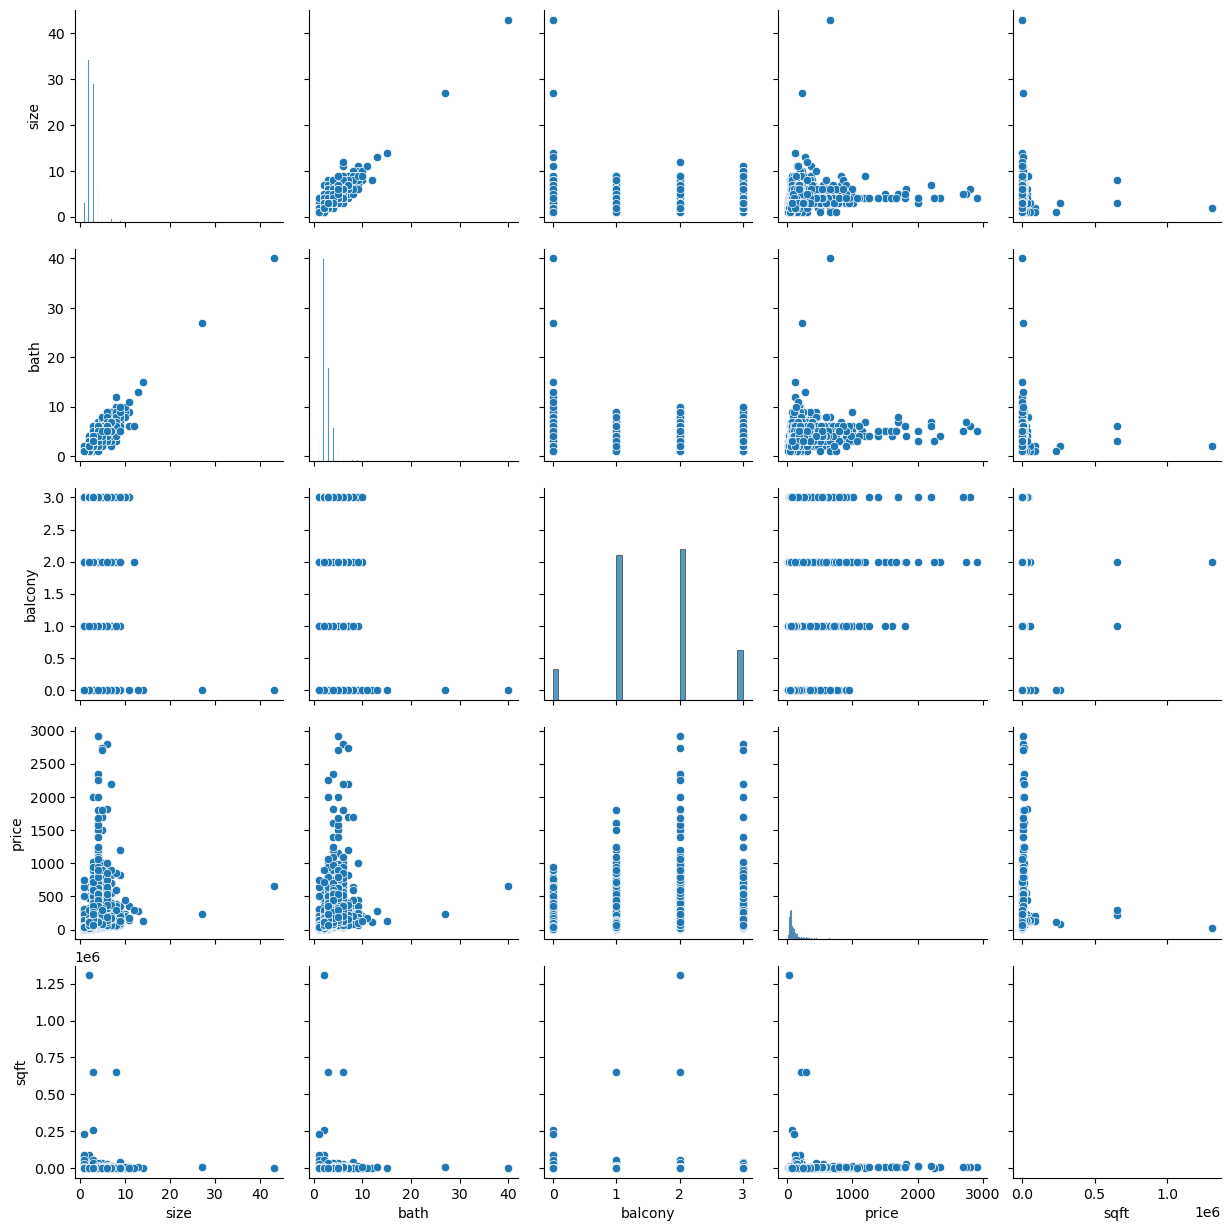

In [43]:
sns.pairplot(housing.dropna())
plt.show()

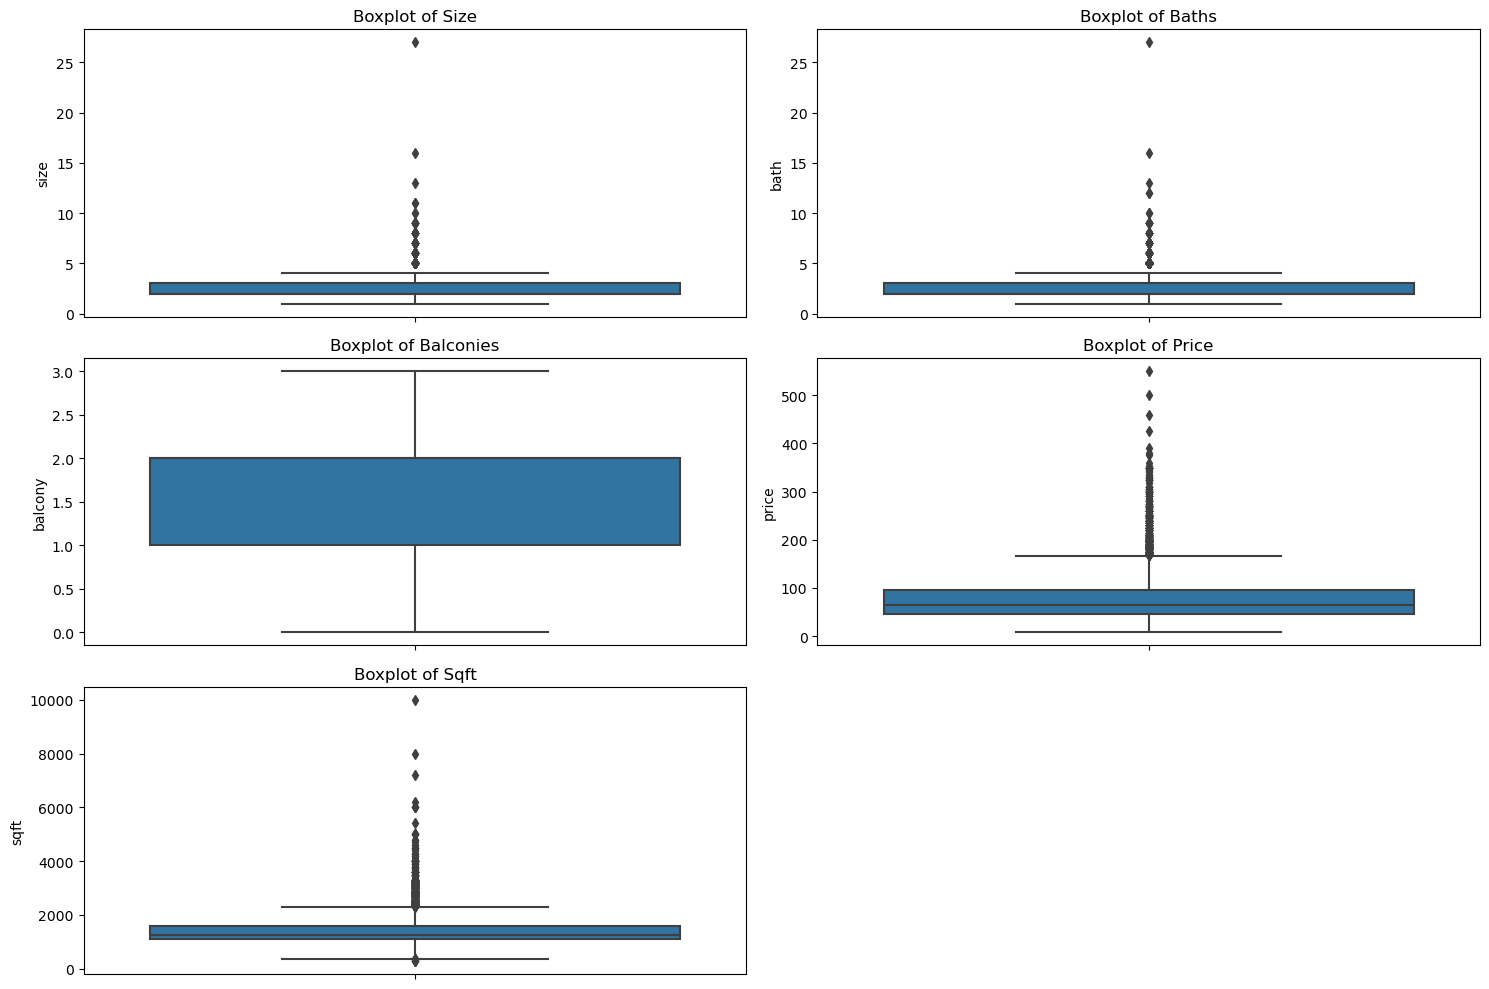

In [103]:
plt.figure(figsize=(15, 10))

# Create a 3x2 grid of subplots
plt.subplot(3, 2, 1)
sns.boxplot(y=housing['size'])
plt.title('Boxplot of Size')

plt.subplot(3, 2, 2)
sns.boxplot(y=housing['bath'])
plt.title('Boxplot of Baths')

plt.subplot(3, 2, 3)
sns.boxplot(y=housing['balcony'])
plt.title('Boxplot of Balconies')

plt.subplot(3, 2, 4)
sns.boxplot(y=housing['price'])
plt.title('Boxplot of Price')

plt.subplot(3, 2, 5)
sns.boxplot(y=housing['sqft'])
plt.title('Boxplot of Sqft')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

mostly data looks linearly correlated and there are outliers as well.

In [44]:
housing.describe()

,size,bath,balcony,price,sqft
count,13304.0,13247.000000,12711.000000,13320.000000,1.332000e+04
mean,2.803743,2.692610,1.584376,112.565627,1.911597e+03
std,1.294974,1.341458,0.817263,148.971674,1.727690e+04
min,1.0,1.000000,0.000000,8.000000,1.000000e+00
25%,2.0,2.000000,1.000000,50.000000,1.100000e+03
50%,3.0,2.000000,2.000000,72.000000,1.277250e+03
75%,3.0,3.000000,2.000000,120.000000,1.680000e+03
max,43.0,40.000000,3.000000,3600.000000,1.306800e+06


Problem facing :
1. We need to use KNN imputer, as we do not want to loose data.
2. We have to find outliers, which is not possible on null value containing data.
3. If we impute values first then we will not be able to use cross validation test on our model as data will leak and also outliers will affect the imputation. 

Aproaches according to me -
1. Good Approach - If we remove outliers first without keeping the non null values. and then perform outlier detection this can be a problem because we are using subset of the data. But in our case since null values are less as compared to the size of data set. As per my thinking we can perform outlier detection without null values. And then we will impute null values using KNN imputer.
2. Good Approach - If we do train test split first and then impute values using KNN imputer and then remove outliers (which we are again doing on subset of data) and then do train our model but to cross validate our model will not be possible in this case. 

Moving with approach 1

We gonna remove outliers by creating new columns which are "price_per_sqft" and "sqftperbhk"

In [45]:
housing['price_per_sqft'] = housing['price']/housing['sqft']
housing['sqftperbhk'] = housing['sqft']/housing['size']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25624\76127647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['price_per_sqft'])
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

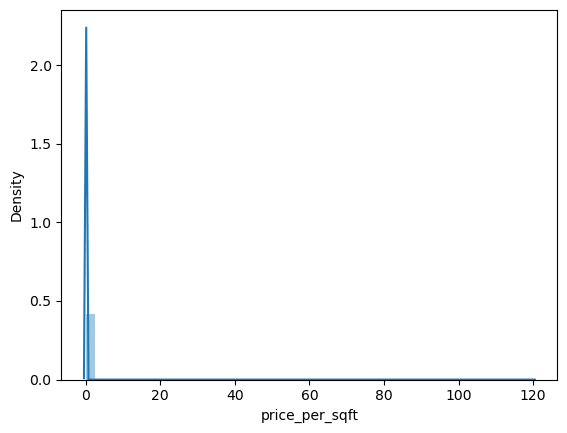

In [46]:
sns.distplot(housing['price_per_sqft'])

so the data looks extremely right skewed. so we should remove outliers based on IQR method

In [47]:
housing.shape

(13320, 12)

In [48]:
Q3 = housing['price_per_sqft'].describe()['75%']
Q1 = housing['price_per_sqft'].describe()['25%']
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
housing = housing[(housing['price_per_sqft'] < upper_limit) & (housing['price_per_sqft'] > lower_limit)]

In [49]:
housing.shape

(12049, 12)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25624\76127647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['price_per_sqft'])
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

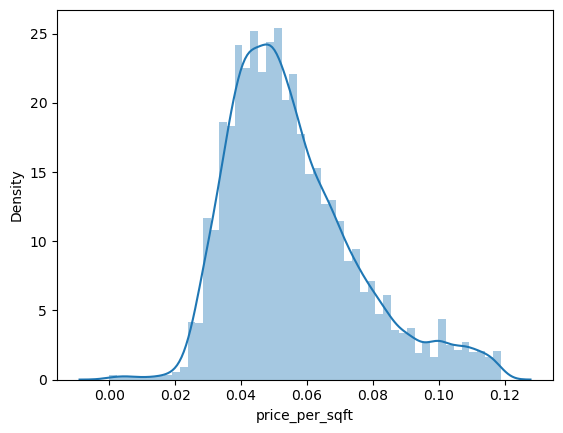

In [50]:
sns.distplot(housing['price_per_sqft'])

In [51]:
housing.shape

(12049, 12)

In [52]:
housing.drop(['price_per_sqft'], axis='columns',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25624\434799041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['sqftperbhk'])
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqftperbhk', ylabel='Density'>

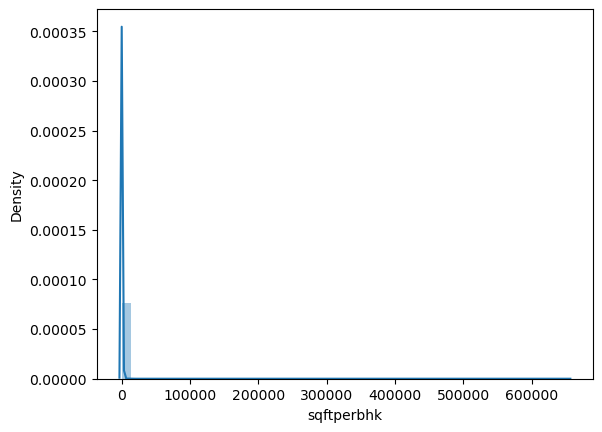

In [53]:
sns.distplot(housing['sqftperbhk'])

In [54]:
Q3 = housing['sqftperbhk'].describe()['75%']
Q1 = housing['sqftperbhk'].describe()['25%']
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
housing = housing[(housing['sqftperbhk'] < upper_limit) & (housing['sqftperbhk'] > lower_limit)]

In [55]:
housing.shape

(11069, 11)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25624\434799041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['sqftperbhk'])
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqftperbhk', ylabel='Density'>

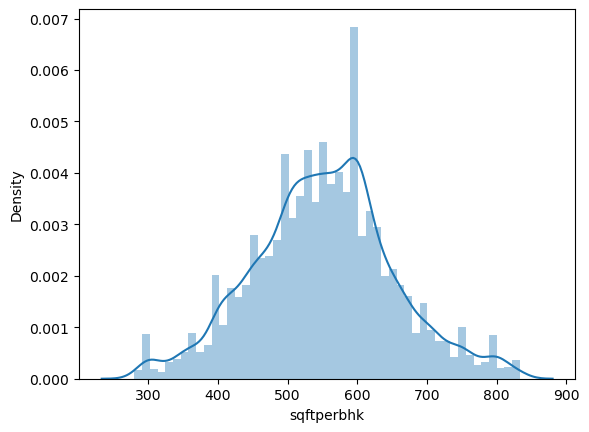

In [56]:
sns.distplot(housing['sqftperbhk'])

In [57]:
housing.drop(['sqftperbhk'], axis='columns',inplace=True)

In [58]:
housing.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             41
balcony         308
price             0
bhk/bedroom       0
sqft              0
dtype: int64

In [59]:
housing[housing['bath'].isnull()].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk/bedroom,sqft
1615,Super built-up Area,to be vacated,bannerghatta,4,1791 - 4000,NaN,NaN,246.00,BHK,2895.5
2174,Built-up Area,to be vacated,bettahalsoor,5,3210,NaN,NaN,353.00,Bedroom,3210.0
2208,Super built-up Area,to be vacated,bhoganhalli,4,1974 - 2171,NaN,NaN,111.00,BHK,2072.5
2296,Super built-up Area,to be vacated,binny pete,4,2695 - 2940,NaN,NaN,204.00,BHK,2817.5
2376,Super built-up Area,Immediate Possession,bommanahalli,3,1360 - 1890,NaN,NaN,87.72,BHK,1625.0


In [60]:
housing.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk/bedroom', 'sqft'],
      dtype='object')

# Choosing the best model and choosing best encoding for location

So I tried frequency encoding, one hot encoding and mean encoding for location. And finally found that mean encoding on price and price per sqft works good for location. And moving forward with it only.

In [61]:
housing['price_per_sqft'] = housing['price'] / housing['sqft']

In [62]:
mean_prices = housing.groupby('location')['price'].mean()
mean_price_per_sqft = housing.groupby('location')['price_per_sqft'].mean()

# Map the mean prices to the original DataFrame
housing['location_encoded_price'] = housing['location'].map(mean_prices)
housing['location_encoded_price_per_sqft'] = housing['location'].map(mean_price_per_sqft)

In [63]:
# Calculate the global mean of the target variable
global_mean = housing['price_per_sqft'].mean()

# Define the smoothing parameter
m = 3

# Apply smoothing to the target encoding
def smooth_mean_encoding(col, target, m, global_mean):
    agg = housing.groupby(col)[target].agg(['mean', 'count'])
    mean_encoded = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
    return mean_encoded

# Apply the smooth mean encoding to the 'standardized_location' column
mean_encoded = smooth_mean_encoding('location', 'price_per_sqft', m, global_mean)
housing['location_encoded_price_per_sqft'] = housing['location'].map(mean_encoded)

housing

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk/bedroom,sqft,price_per_sqft,location_encoded_price,location_encoded_price_per_sqft
1,Super built-up Area,Immediate Possession,1 giri nagar,11,5000,9.0,3.0,360.00,BHK,5000.0,0.072000,103.408000,0.060099
4,Built-up Area,Immediate Possession,1 giri nagar,4,2400,4.0,1.0,150.00,Bedroom,2400.0,0.062500,103.408000,0.060099
5,Plot Area,Immediate Possession,1 giri nagar,4,1200,2.0,1.0,140.00,Bedroom,1200.0,0.116667,103.408000,0.060099
6,Super built-up Area,Immediate Possession,1 giri nagar,3,1500,2.0,1.0,65.00,BHK,1500.0,0.043333,103.408000,0.060099
7,Super built-up Area,Immediate Possession,1 giri nagar,2,1200,2.0,1.0,54.00,BHK,1200.0,0.045000,103.408000,0.060099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Immediate Possession,yeshwanthpur,3,1675,3.0,NaN,92.13,BHK,1675.0,0.055003,87.209643,0.064668
13316,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,3,2100,3.0,2.0,240.00,BHK,2100.0,0.114286,250.000000,0.077342
13317,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,2,1415,2.0,2.0,120.00,BHK,1415.0,0.084806,250.000000,0.077342
13318,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,6,3800,6.0,NaN,390.00,BHK,3800.0,0.102632,250.000000,0.077342


In [64]:
# Calculate the global mean of the target variable
global_mean = housing['price'].mean()

# Define the smoothing parameter
m = 3

# Apply smoothing to the target encoding
def smooth_mean_encoding(col, target, m, global_mean):
    agg = housing.groupby(col)[target].agg(['mean', 'count'])
    mean_encoded = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)
    return mean_encoded

# Apply the smooth mean encoding to the 'standardized_location' column
mean_encoded = smooth_mean_encoding('location', 'price', m, global_mean)
housing['location_encoded_price'] = housing['location'].map(mean_encoded)

housing

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk/bedroom,sqft,price_per_sqft,location_encoded_price,location_encoded_price_per_sqft
1,Super built-up Area,Immediate Possession,1 giri nagar,11,5000,9.0,3.0,360.00,BHK,5000.0,0.072000,99.199256,0.060099
4,Built-up Area,Immediate Possession,1 giri nagar,4,2400,4.0,1.0,150.00,Bedroom,2400.0,0.062500,99.199256,0.060099
5,Plot Area,Immediate Possession,1 giri nagar,4,1200,2.0,1.0,140.00,Bedroom,1200.0,0.116667,99.199256,0.060099
6,Super built-up Area,Immediate Possession,1 giri nagar,3,1500,2.0,1.0,65.00,BHK,1500.0,0.043333,99.199256,0.060099
7,Super built-up Area,Immediate Possession,1 giri nagar,2,1200,2.0,1.0,54.00,BHK,1200.0,0.045000,99.199256,0.060099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Immediate Possession,yeshwanthpur,3,1675,3.0,NaN,92.13,BHK,1675.0,0.055003,86.837556,0.064668
13316,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,3,2100,3.0,2.0,240.00,BHK,2100.0,0.114286,164.077769,0.077342
13317,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,2,1415,2.0,2.0,120.00,BHK,1415.0,0.084806,164.077769,0.077342
13318,Super built-up Area,Immediate Possession,yeshwanthpur industrial suburb,6,3800,6.0,NaN,390.00,BHK,3800.0,0.102632,164.077769,0.077342


to use cross validation and to choose best model we need to drop the null value column as we can't use KNN Imputer in the pipeline for using CV as well 

In [65]:
housing_copy = housing.dropna()

In [66]:
housing_copy = housing_copy[~(housing_copy['bath'] > housing_copy['size'] + 1)]
X = housing_copy.drop(['location', 'total_sqft', 'price_per_sqft', 'price'], axis='columns')
y = housing_copy['price']

In [67]:
X = pd.get_dummies(X, drop_first=True)

In [68]:
X.isnull().sum()

size                               0
bath                               0
balcony                            0
sqft                               0
location_encoded_price             0
location_encoded_price_per_sqft    0
area_type_Carpet  Area             0
area_type_Plot  Area               0
area_type_Super built-up  Area     0
availability_to be vacated         0
bhk/bedroom_Bedroom                0
bhk/bedroom_RK                     0
dtype: int64

In [69]:
# X['log_sqft'] = np.log(X['sqft'])
X['location_encoded_price_per_sqft'] = (X['location_encoded_price_per_sqft'] - X['location_encoded_price_per_sqft'].mean())/X['location_encoded_price_per_sqft'].std()
X['location_encoded_price'] = (X['location_encoded_price'] - X['location_encoded_price'].mean())/X['location_encoded_price'].std()
X['size'] = (X['size'] - X['size'].mean())/X['size'].std()
X['bath'] = (X['bath'] - X['bath'].mean())/X['bath'].std()
X['balcony'] = (X['balcony'] - X['balcony'].mean())/X['balcony'].std()
X['sqft'] = (X['sqft'] - X['sqft'].mean())/X['sqft'].std()
X['sqft_per_bhk'] = X['sqft']/X['size']

In [70]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500],
                'max_depth': [2, 4, 6, 8],
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
        gs.fit(X, y)

        best_params = gs.best_params_
        # Capturing the best training parameters
        best_train_params = {param: gs.cv_results_[f'param_{param}'][gs.best_index_] 
                             for param in best_params}
        # Capturing the best training score
        best_train_score = gs.cv_results_['mean_train_score'][gs.best_index_]

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': best_params,
            'best_train_params': best_train_params,
            'best_train_score': best_train_score  # Added this line
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_train_params', 'best_train_score'])


find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params,best_train_params,best_train_score
0,linear_regression,0.749573,{},{},0.755994
1,lasso,0.748510,"{'alpha': 0.1, 'selection': 'cyclic'}","{'alpha': 0.1, 'selection': 'cyclic'}",0.755416
2,ridge,0.749571,{'alpha': 0.1},{'alpha': 0.1},0.755994
3,random_forest,0.784983,"{'max_depth': 8, 'n_estimators': 500}","{'max_depth': 8, 'n_estimators': 500}",0.865923
4,xgboost,0.780970,{'n_estimators': 100},{'n_estimators': 100},0.941269


In [71]:
housing.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'bhk/bedroom', 'sqft', 'price_per_sqft',
       'location_encoded_price', 'location_encoded_price_per_sqft'],
      dtype='object')

#### What things I tried and it didn't worked and didn't increased r2 score of the model ?
1. I tried using One hot encoding, frequency encoding on location.
2. I tried using Ordinal encoding for area_type column.
3. I tried removing some of the rows which are having more than 2 bathrooms as compared to the size of the house. size > bath + 1
4. Removing outliers from price column grouping them based on the size of house.
5. Removing balcony as it has less correlation with the price.
6. Keeping price_per_sqft increases the r2 score even to 100%. But this is because keeping price_per_sqft make things for data leakage.

In [72]:
housing.drop(['location', 'total_sqft', 'price_per_sqft'], axis='columns', inplace=True)

In [73]:
housing

,area_type,availability,size,bath,balcony,price,bhk/bedroom,sqft,location_encoded_price,location_encoded_price_per_sqft
1,Super built-up Area,Immediate Possession,11,9.0,3.0,360.00,BHK,5000.0,99.199256,0.060099
4,Built-up Area,Immediate Possession,4,4.0,1.0,150.00,Bedroom,2400.0,99.199256,0.060099
5,Plot Area,Immediate Possession,4,2.0,1.0,140.00,Bedroom,1200.0,99.199256,0.060099
6,Super built-up Area,Immediate Possession,3,2.0,1.0,65.00,BHK,1500.0,99.199256,0.060099
7,Super built-up Area,Immediate Possession,2,2.0,1.0,54.00,BHK,1200.0,99.199256,0.060099
...,...,...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Immediate Possession,3,3.0,NaN,92.13,BHK,1675.0,86.837556,0.064668
13316,Super built-up Area,Immediate Possession,3,3.0,2.0,240.00,BHK,2100.0,164.077769,0.077342
13317,Super built-up Area,Immediate Possession,2,2.0,2.0,120.00,BHK,1415.0,164.077769,0.077342
13318,Super built-up Area,Immediate Possession,6,6.0,NaN,390.00,BHK,3800.0,164.077769,0.077342


# Creating pipeline

Mistake which I did previously :
using price column in KNN imputer. It also makes data leakage

In [74]:
X = housing.drop(['price'], axis='columns')
y = housing['price']

In [75]:
# Define the column groups
impute_cols = ['sqft', 'size', 'bath', 'balcony']  # Columns for KNN Imputer
onehot_cols = ['area_type', 'availability', 'bhk/bedroom']  # Columns for One-Hot Encoding
scale_cols = ['size', 'sqft', 'bath', 'balcony', 'location_encoded_price', 'location_encoded_price_per_sqft']  # Columns for Standard Scaling
bhk_bedroom_rk = ['bhk/bedroom']

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(n_neighbors=5), impute_cols),
        ('onehot_encoder', OneHotEncoder(drop_last=True), onehot_cols),
        ('scaler', StandardScaler(), scale_cols)
    ],
    remainder='passthrough'  # Pass through other columns unchanged
)

In [77]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth= 8, n_estimators= 500))
])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
X_train.isnull().sum()

area_type                            0
availability                         0
size                                 0
bath                                28
balcony                            199
bhk/bedroom                          0
sqft                                 0
location_encoded_price               0
location_encoded_price_per_sqft      0
dtype: int64

In [80]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knn_imputer', KNNImputer(),
                                                  ['sqft', 'size', 'bath',
                                                   'balcony']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop_last=True),
                                                  ['area_type', 'availability',
                                                   'bhk/bedroom']),
                                                 ('scaler', StandardScaler(),
                                                  ['size', 'sqft', 'bath',
                                                   'balcony',
                                                   'location_encoded_price',
                                                   'location_encoded_price_per_sqft'])])),
                ('model',
                 RandomForestRegressor(max_depth=8, n_estimators=500))])

In [81]:
y_pred = pipeline.predict(X_test)

In [82]:
r2_score(y_true=y_test, y_pred=y_pred)

0.8059241372733987

In [83]:
y_train_pred = pipeline.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8701749786938994

#### pickle dump

In [84]:
with open('house_pred_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [88]:
# why have you dropped the society column ?
either one hot encoding or I should have to do mean encoding we can get help from mean encoding as well but the problem is we have filled most of the values at our own the society name was not present previously at his own. this might lead to problem sometimes.